In [ ]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("naml_exams"):
    os.chdir("..")

# Exercise 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

Consider the Breast Cancer Wisconsin dataset. It contains features computed from digitized images of
fine needle aspirate (FNA) of breast masses. These features are used to classify the tumors into malignant
(cancerous) or benign (non-cancerous).
Here’s an overview of the dataset:

- Number of Instances: 569,
- Number of Features: 30 numeric (real-valued features),
- Target Variable: Binary (0 for malignant, 1 for benign).


In [ ]:
data = load_breast_cancer()
X = data.data
X = np.transpose(X)
y = data.target

feature_names = np.array(data.feature_names)
print(feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# In this case each row represent a feature and each column represent a sample

n_features = X.shape[0]  # Number of rows is the number of features
n_patients = X.shape[1]  # Number of columns is the number of samples

print(f"{n_features} features")
print(f"{n_patients} patients")

30 features
569 patients


How many patients with and without cancer are there in the dataset?


In [ ]:
print(f"{len(y[y==0])} patients with malignant")
print(f"{len(y[y==1])} patients without bening")

212 patients with malignant
357 patients without bening


Choose two features, and make a scatterplot of the corresponding values plotting with different colors the data corresponding to patients with and without cancer.


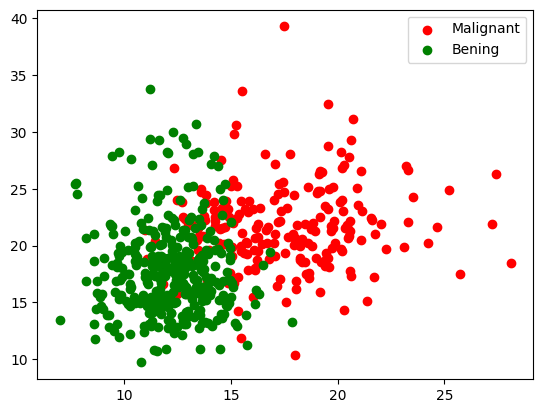

In [ ]:
feature_1 = 0
feature_2 = 1

plt.scatter(X[feature_1, y == 0], X[feature_2, y == 0], label="Malignant", color="r")
plt.scatter(X[feature_1, y == 1], X[feature_2, y == 1], label="Bening", color="g")
plt.legend()

Perform the PCA on the data, the plot the trend of the following quantities: singular values, cumulate fraction of singular values, cumulate fraction of the "explained variance".


In [ ]:
X_mean = np.mean(X, axis=1)
X_bar = X - X_mean[:, None]
U, s, VT = np.linalg.svd(X_bar, full_matrices=False)

Text(0.5, 1.0, 'cumulate fraction of explained variance')

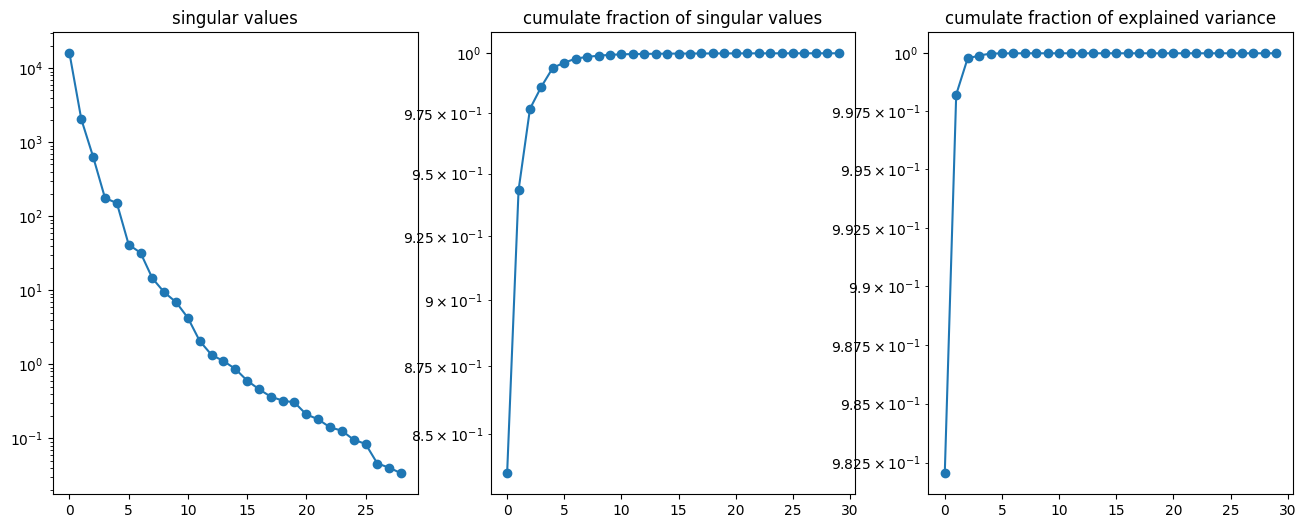

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

# drop the last singular value since it is very close to 0
axs[0].semilogy(s[:-1], "o-")
axs[0].set_title("singular values")

axs[1].semilogy(np.cumsum(s) / np.sum(s), "o-")
axs[1].set_title("cumulate fraction of singular values")

axs[2].semilogy(np.cumsum(s**2) / np.sum(s**2), "o-")
axs[2].set_title("cumulate fraction of explained variance")

Make a scatterplot of the first two principal components of the patients.


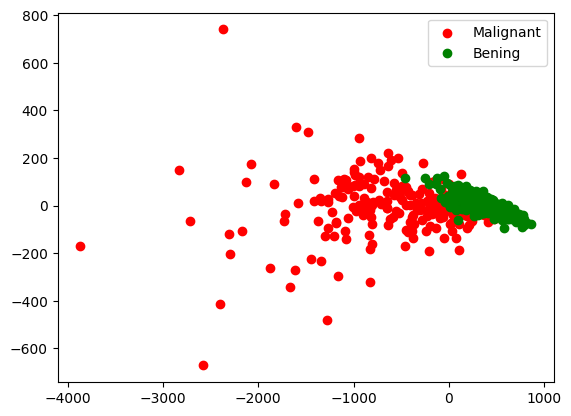

In [ ]:
principal_components = U.T @ X_bar
pc_1 = principal_components[0, :]
pc_2 = principal_components[1, :]

plt.scatter(pc_1[y == 0], pc_2[y == 0], color="r", label="Malignant")
plt.scatter(pc_1[y == 1], pc_2[y == 1], color="g", label="Bening")
plt.legend()

Implement a function for computing the randomized SVD of rank k for a generic matrix.

In [25]:
def randomized_SVD(X: np.ndarray, k: int):
  _, m = X.shape[0], X.shape[1]
  G = np.random.randn(m, k) #Build the gaussian random matrix (namely G)
  Y = X @ G #Define Y as the matrix multiplication
  Q, _ = np.linalg.qr(Y) #Apply the QR factorization on Y
  B = Q.T @ X #Define the matrix B
  U_Y, s, VT = np.linalg.svd(B, full_matrices = False) #Apply SVD on B
  U = Q @ U_Y #Lifting up U_Y
  return U, s, VT

Set k = 10 and compute the randomized SVD of the dataset and the principal components.

In [26]:
k = 10
randU, randS, randVT = randomized_SVD(X_bar, k)
randPHI = randU.T @ X_bar

Select and display the top five most influential features for each principal axis.

In [ ]:
threshold = 0 # To select the "importance"

for i in range(5):
  print(f'Important features in the direction {i+1}')
  print(feature_names[U[:, i] > threshold])

Important features in the direction 1
['mean fractal dimension' 'texture error' 'smoothness error'
 'symmetry error' 'fractal dimension error']
Important features in the direction 2
['mean radius' 'mean perimeter' 'mean area' 'mean concavity'
 'mean concave points' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error']
Important features in the direction 3
['mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error']
Important features in the direction 4
['mean radius' 'mean texture' 'mean perimeter' 'mean smoothness'
 'mean compactness' 'mean concavity' 'mean concave points' 'mean symmetry'
 'mean fractal dimension' 'radius err

Compute the relative reconstruction error between the original matrix X and the approximation $\hat{X}$ obtained using the randomized SVD and by varying k. The expression of the relative reconstruction error is given by
$$
\epsilon_R = {{|| X - \hat{X}||_F}\over{||X||_F}}.
$$
Visualize the trend of the error with respect to the rank k and comment the results.

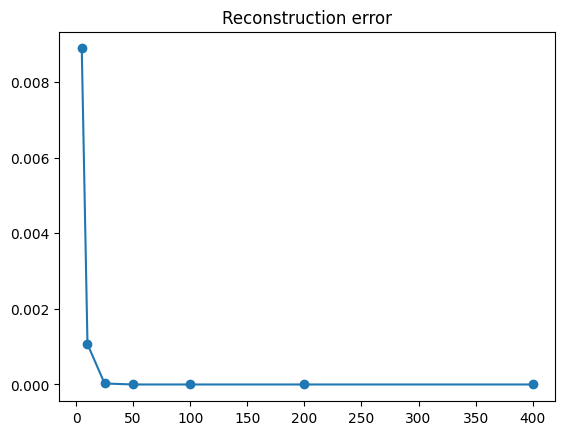

In [31]:
ks = [5, 10, 25, 50, 100, 200, 400]
recon_error = []
U, s, VT = np.linalg.svd(X_bar, full_matrices = False)

for i in range(len(ks)):
  k = ks[i]
  randU, rands, randVT = randomized_SVD(X_bar, k)
  Xk = np.matmul(randU[:,:k], np.matmul(np.diag(rands[:k]),randVT[:k,:])) #np.diag transforms the vector s in the matrix S
  error = np.linalg.norm(X_bar - Xk, ord='fro') / np.linalg.norm(X_bar,ord='fro')
  recon_error.append(error)

plt.title("Reconstruction error")
plt.plot(ks, recon_error, 'o-')

As we can see by incresing the number k, the reconstruction error is decreasing: this result is coherent with theory since the parameter k is related to the dimension on which the SVD is performed in the randomized version: the greater the better is the approximation provided by RSVD.

# Exercise 2

In [124]:
import pandas as pd
import numpy as np
import jax
import jax.numpy as jnp

np.random.seed(0)

Load the data contained in file ex2.txt as follows:

In [125]:
df = pd.read_csv('data/ex2.txt', sep=',', header=None)
df.columns = ['Score_1', 'Score_2', 'label']
m = df.shape[0]
X = np.hstack((np.ones((m,1)),df[['Score_1', 'Score_2']].values))
y = np.array(df.label.values).reshape(-1,1)
X.shape, y.shape

((100, 3), (100, 1))

The dataset contains 100 rows that represents students. There are 3 columns: the first two columns are the
marks obtained by the students in the 2 most difficult exams of the first year of the Master; the value in the
third column is 1 if the student has been able to complete the Master in 2 years otherwise is 0.

Consider a logistic regression model given by:
$$
h_{\theta}(x) = {{1}\over{1 + e^{-\theta^Tx}}}
$$
where $\theta \in \mathbb{R}^3$ is the parameter vector. The cost function for the logistic regression is given by the log-loss:
$$
J(\theta) = -{1 \over 100} \sum^{100}_{i=1} [y_i \log(h_{\theta}(x_i)) + (1 - y_i)\log(1-h_{\theta}(x_i))].
$$

In [126]:
def sigmoid(z):
    return 1 / (1 + jnp.exp(-z))

def loss(w, x, y):
    z = x.T @ w  # shape (batch_size,)
    y_pred = sigmoid(z)
    return -jnp.mean(y * jnp.log(y_pred) + (1 - y) * jnp.log(1 - y_pred))

In [127]:
loss_jit = jax.jit(loss)
grad_jit = jax.jit(jax.grad(loss, argnums=0))

Implement the Stochastic Gradient Descent (SGD) algorithm to minimize $J(\theta)$

In [128]:
def SGD(
    X: np.ndarray,
    y: np.ndarray,
    learning_rate: float,
    epochs: int,
    batch_size: int,
    loss:callable,
    grad:callable,
):
    n_samples = X.shape[0]
    w = jnp.zeros([X.shape[1]])  # Initialize w to zero vector
    loss_history = []
    for epoch in range(epochs):
        idx = np.random.choice(n_samples, batch_size)
        g = grad(w, X[idx].reshape(-1), y[idx])
        w -= learning_rate * g
        loss_history.append(loss(w, X.T, y))
    return loss_history, w

Apply the SGD in order to compute the optimal value of $\theta$.

[0.00022589 0.01166988 0.01134468]


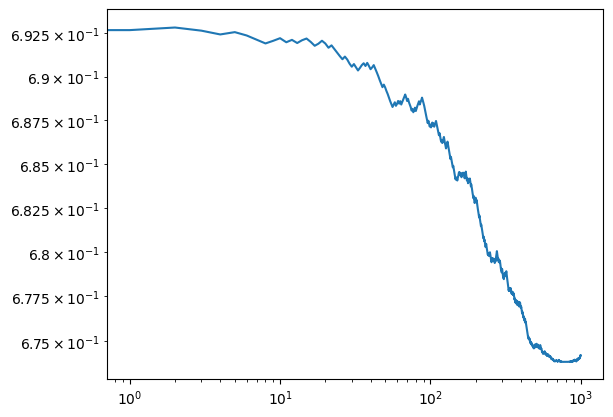

In [132]:
learning_rate = 5e-6
epochs = 1000
batch_size = 20

loss_history, weights = SGD(
    X=X,
    y=y,
    learning_rate=learning_rate,
    epochs=epochs,
    batch_size=1,
    loss=loss_jit,
    grad=grad_jit,
)
print(weights)
plt.loglog(loss_history, label="SGD")